Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = 0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

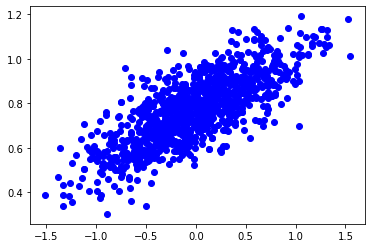

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

**Batch Gradient Descent** - wykorzystujemy **cały zbiór danych**

Definicja błędu:

In [ ]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
Loss = []
epochs = 50
learning_rate = 0.5

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

In [ ]:
np.max(Loss),np.min(Loss)

(0.12431604, 0.009643973)

In [ ]:
print(a.numpy())
print(b.numpy())

0.22123069
0.7781986


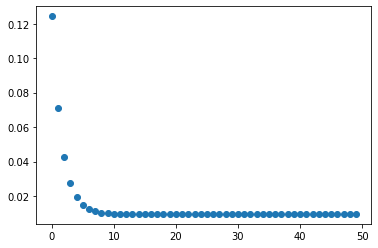

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

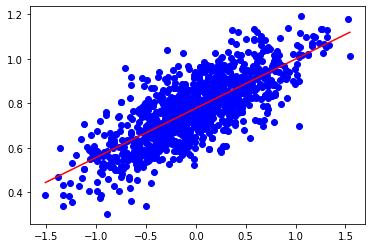

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset)) 
    np.random.shuffle(arr) 
    x_train = [x_dataset[i] for i in arr[0:subset_size]]
    y_train = [y_dataset[i] for i in arr[0:subset_size]]
    return x_train,y_train

In [ ]:
Loss = []
epochs = 50
learning_rate = 0.2
batch_size = 50

for i in range(epochs):

  real_x_batch,real_y_batch = subset_dataset(real_x, real_y, batch_size)

  with tf.GradientTape() as tape:
    pred_y = a * real_x_batch + b
    loss = loss_fn(real_y_batch, pred_y)
    Loss.append(loss.numpy())
    
    grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)  

In [ ]:
Loss

[0.13749635,
 0.16596325,
 0.07637184,
 0.08772915,
 0.057952028,
 0.046088625,
 0.034862354,
 0.051895693,
 0.030717585,
 0.02714933,
 0.0214724,
 0.018880617,
 0.022583079,
 0.022995252,
 0.015717573,
 0.011842714,
 0.009138189,
 0.011326194,
 0.011580006,
 0.0089074345,
 0.00909417,
 0.00945967,
 0.009684494,
 0.007530687,
 0.006995874,
 0.00882592,
 0.007977027,
 0.010464512,
 0.009475979,
 0.011514549,
 0.008481368,
 0.011117264,
 0.010115247,
 0.0104933735,
 0.0063645677,
 0.009335336,
 0.008972936,
 0.0077148504,
 0.009855271,
 0.0097041465,
 0.008989746,
 0.015254986,
 0.0101312585,
 0.0088323215,
 0.009801544,
 0.00926241,
 0.009351279,
 0.008638096,
 0.006596165,
 0.009509763]

In [ ]:
np.max(Loss),np.min(Loss)

(0.24566731, 0.007644926)

In [ ]:
print(a.numpy())
print(b.numpy())

-0.20831811
0.7800122


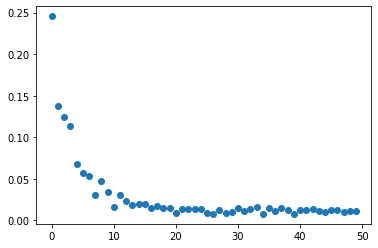

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

A teraz bardziej formalnie:

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [ ]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [ ]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.1)
opt = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(loss='MSE',optimizer=opt)

Informacja o modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Proces **uczenia**:

In [ ]:
epochs = 1000
h = model.fit(real_x,real_y, verbose=1, epochs=epochs, batch_size=100)

Epoch 1/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.5258
Epoch 2/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1054
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 6/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 8/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 11/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 12/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/1000
10/10 [====

In [ ]:
Loss = h.history['loss']
Loss

[0.37169450521469116,
 0.0822155624628067,
 0.03352728486061096,
 0.01764485612511635,
 0.012335695326328278,
 0.010539262555539608,
 0.009970241226255894,
 0.009757171384990215,
 0.009707559831440449,
 0.009671948850154877,
 0.00965836737304926,
 0.009682666510343552,
 0.00966738909482956,
 0.009662534110248089,
 0.0096585089340806,
 0.009659681469202042,
 0.009674908593297005,
 0.009659657254815102,
 0.009665032848715782,
 0.00965113379061222,
 0.00966755673289299,
 0.009668230079114437,
 0.009656115435063839,
 0.009671647101640701,
 0.009677691385149956,
 0.009651193395256996,
 0.00965958647429943,
 0.009654424153268337,
 0.009651626460254192,
 0.009665136225521564,
 0.009650135412812233,
 0.009665547870099545,
 0.009656946174800396,
 0.009682401083409786,
 0.009662698954343796,
 0.009666516445577145,
 0.009668257087469101,
 0.009665274061262608,
 0.009668439626693726,
 0.009652301669120789,
 0.009668437764048576,
 0.00966100674122572,
 0.009667222388088703,
 0.009657911024987698,
 

Sprawdźmy jakie są **wartości wag**:

In [ ]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.22149108]]
[0.7772312]


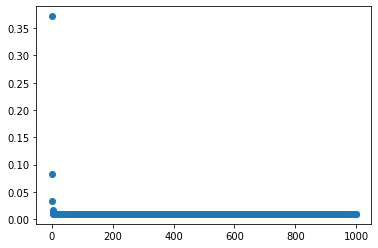

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

**Dwa gangi**

Zbiór danych:

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

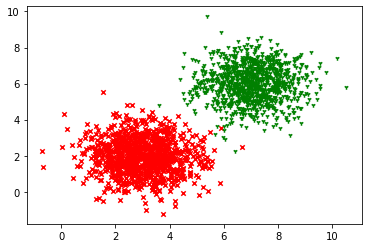

In [ ]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Definiujemy model:

In [ ]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [ ]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.1)
opt = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Przygotowanie danych:

In [ ]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[2.68290275, 2.30497594],
       [2.56256357, 2.01955879],
       [2.29175225, 1.46427763],
       ...,
       [7.10563371, 7.34984778],
       [5.31464324, 5.53313102],
       [6.24864291, 4.82178135]])

Proces **uczenia**:

In [ ]:
epochs = 1000
h = model.fit(data_points,labels, verbose=1, epochs=epochs, batch_size=1000)

Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 1.6140
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 1.0133
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9803
Epoch 4/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.9394
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.9046
Epoch 6/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8649
Epoch 7/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8407
Epoch 8/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.8090
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7866
Epoch 10/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7604
Epoch 11/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7261
Epoch 12/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.7048
Epoch 13/1000
2/2 [==============================

In [ ]:
Loss = h.history['loss']
Loss

[1.4788753986358643,
 1.0109714269638062,
 0.9727728366851807,
 0.9373832941055298,
 0.9035986661911011,
 0.87176913022995,
 0.8399389386177063,
 0.8100100159645081,
 0.7815617918968201,
 0.7545510530471802,
 0.7289878129959106,
 0.704974353313446,
 0.6824278235435486,
 0.6605461835861206,
 0.6399461030960083,
 0.6209518909454346,
 0.6032325029373169,
 0.5868420600891113,
 0.57127845287323,
 0.5566203594207764,
 0.5431058406829834,
 0.5304562449455261,
 0.5190178155899048,
 0.5082281231880188,
 0.4980078637599945,
 0.48785316944122314,
 0.4788700044155121,
 0.47038891911506653,
 0.46247410774230957,
 0.455005943775177,
 0.44797301292419434,
 0.44136083126068115,
 0.4351206123828888,
 0.4290911555290222,
 0.42382723093032837,
 0.41831234097480774,
 0.412964403629303,
 0.4079761207103729,
 0.40326452255249023,
 0.3987569510936737,
 0.3946134150028229,
 0.39050573110580444,
 0.38629522919654846,
 0.38248932361602783,
 0.37890368700027466,
 0.37551024556159973,
 0.37161141633987427,
 0.368

Sprawdźmy jakie są **wartości wag**:

In [ ]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.74234176]
 [1.0929999 ]]
[-7.725536]


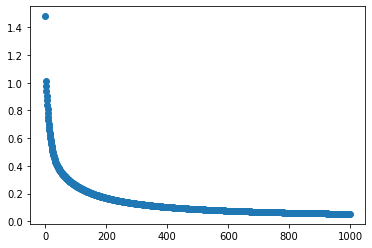

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

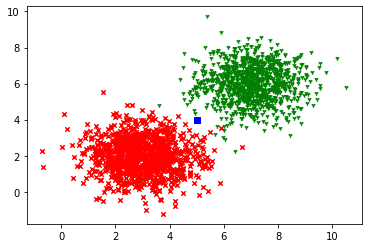

In [ ]:
x=5.0
y=4.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

In [ ]:
model.predict([[x,y]])

array([[0.5885981]], dtype=float32)

**zad.1**

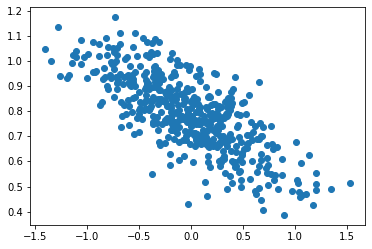

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

number_of_points = 500
x_point = []
y_point = []

a = 0.22 
b = 0.78

for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (-a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

plt.scatter(x_point,y_point,c='tab:blue')
plt.show()

In [6]:
real_x = np.array(x_point)
real_y = np.array(y_point)

a = tf.Variable(random.random())
b = tf.Variable(random.random())

def loss_fn(real_y, pred_y):
  return tf.reduce_mean((real_y - pred_y)**2)

In [7]:
Loss = []
epochs = 50
learning_rate = 0.1

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate * dloss_da)
  b.assign_sub(learning_rate * dloss_db)

np.max(Loss), np.min(Loss)

print(a.numpy())
print(b.numpy())

-0.1567341
0.78582823


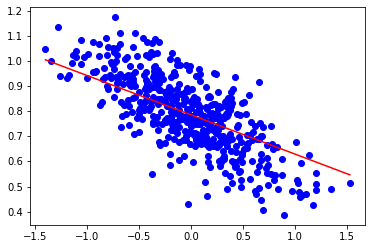

In [16]:
X = np.linspace(np.min(x_point), np.max(x_point), num = 10)

plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

# błąd wolniej się zmniejsza ze zmiejszeniem wartości uczenia
# mamy więcej wartości na wykresie ze wrzostem wartości "epochs"

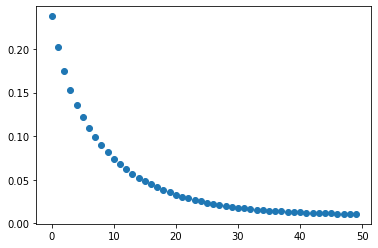

In [10]:
plt.scatter(np.arange(epochs),Loss)
plt.show()
max = np.max(x_point)
min = np.min(x_point)

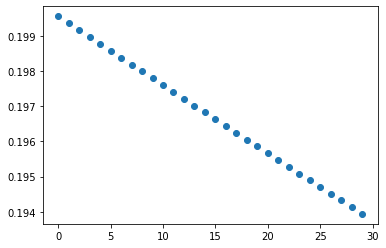

In [ ]:
Loss = []
epochs = 30
learning_rate = 0.001

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)
  
plt.scatter(np.arange(epochs),Loss)
plt.show()

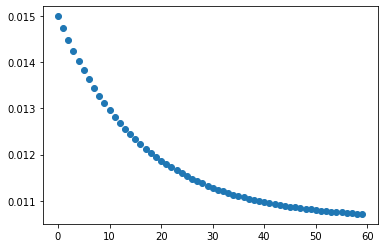

In [ ]:
Loss = []
epochs = 60
learning_rate = 0.06

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

plt.scatter(np.arange(epochs),Loss)
plt.show()

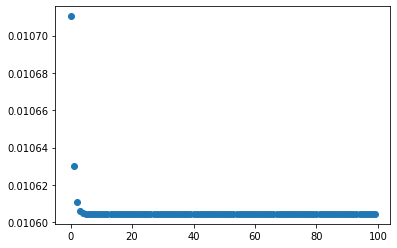

In [ ]:
Loss = []
epochs = 100
learning_rate = 1.0


for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

plt.scatter(np.arange(epochs),Loss)
plt.show()

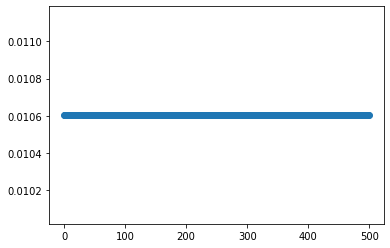

In [ ]:
Loss = []
epochs = 500
learning_rate = 0.1


for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

plt.scatter(np.arange(epochs),Loss)
plt.show()

**zad 2**

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1) + [1.]*len(x_label2))

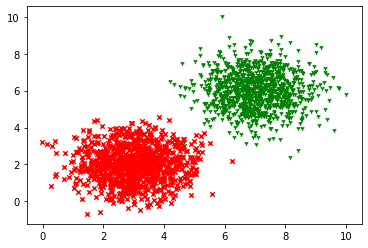

In [18]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [33]:
def loss_fn(y,y_model):
  return tf.reduce_mean(-y*tf.math.log(y_model)-(1-y)*tf.math.log(1-y_model))

In [34]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

real_x1 = np.array(x_label1)
real_y1 = np.array(y_label1)
real_x2 = np.array(x_label2)
real_y2 = np.array(y_label2)

Loss = []
epochs = 1000
learning_rate = 0.001

In [61]:
model = Sequential()
opt = keras.optimizers.SGD(learning_rate=learning_rate)
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = opt)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [62]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[ 2.7871587 ,  3.03576036],
       [ 3.19929533,  2.22406728],
       [ 2.32999898, -0.07442049],
       ...,
       [ 7.04744829,  6.19248736],
       [ 7.15586637,  6.71519077],
       [ 7.18600204,  6.34457261]])

In [37]:
h = model.fit(data_points, labels, verbose = 1, epochs = epochs, batch_size = 1000)

Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.8791
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5918
Epoch 3/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5841
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5745
Epoch 5/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5672
Epoch 6/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.5614
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.5550
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5474
Epoch 9/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5411
Epoch 10/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.5333
Epoch 11/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5273
Epoch 12/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5203
Epoch 13/1000
2/2 [==============================

In [38]:
Loss = h.history['loss']
Loss

[0.8100030422210693,
 0.5899567604064941,
 0.5820146203041077,
 0.574439287185669,
 0.5671131610870361,
 0.5600682497024536,
 0.5533598065376282,
 0.5467127561569214,
 0.5404154658317566,
 0.5341885089874268,
 0.5283727049827576,
 0.522700846195221,
 0.5169577598571777,
 0.5115817189216614,
 0.5069159865379333,
 0.5011129975318909,
 0.49597710371017456,
 0.4908372461795807,
 0.48609796166419983,
 0.4814925193786621,
 0.47694557905197144,
 0.47220730781555176,
 0.4677538275718689,
 0.4637102782726288,
 0.45927271246910095,
 0.4551679790019989,
 0.4510219395160675,
 0.4470829367637634,
 0.4432055652141571,
 0.4396206736564636,
 0.43567290902137756,
 0.43187856674194336,
 0.42820990085601807,
 0.42471224069595337,
 0.4214688837528229,
 0.41770485043525696,
 0.414215087890625,
 0.410865843296051,
 0.4075987637042999,
 0.4045547544956207,
 0.40117841958999634,
 0.3980291485786438,
 0.3949163854122162,
 0.3918606638908386,
 0.3888680338859558,
 0.38595548272132874,
 0.3829993009567261,
 0.38

In [39]:
weights = model.get_weights()
print(weights[0])
print(weights[1]) 

[[0.7398359]
 [1.0897491]]
[-7.772011]


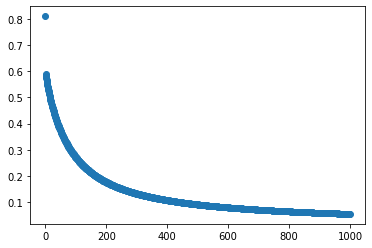

In [40]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

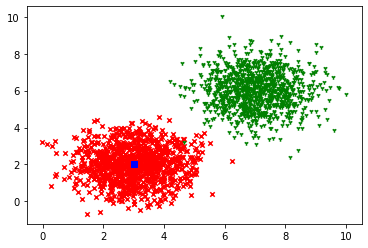

In [41]:
x = 3.0
y = 2.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

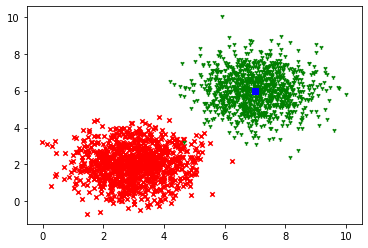

In [42]:
x = 7.0
y = 6.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

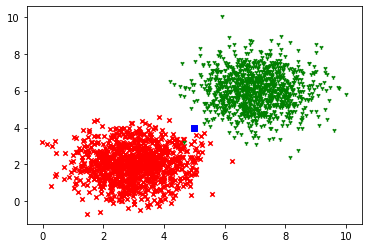

In [43]:
x = 5.0
y = 4.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

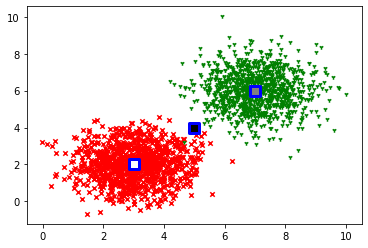

In [58]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
x = 3.0
y = 2.0 
plt.scatter([x],[y],c = 'w', marker='s', linewidths = 3, edgecolor ="blue", s = 100)
x = 7.0
y = 6.0 
plt.scatter([x],[y],c = 'grey', marker='s', linewidths = 3, edgecolor ="blue", s = 100)
x = 5.0
y = 4.0 
plt.scatter([x],[y],c = 'black', marker='s', linewidths = 3, edgecolor ="blue", s = 100)
plt.show()

epochs = 500 and learning rate = 0.5

weights:
[[1.0692374]
 [1.3554108]]
[-10.540627]



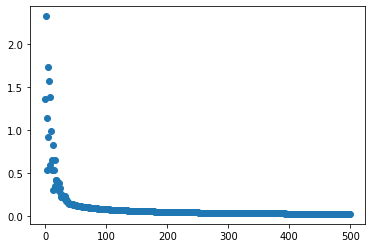

In [75]:
# v1
Loss = []
epochs = 500
learning_rate = 0.5 
print("epochs =", epochs, "and learning rate =", learning_rate)

model = Sequential()
opt = keras.optimizers.SGD(learning_rate=learning_rate)
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = opt)

h = model.fit(data_points, labels, verbose = 0, epochs = epochs, batch_size = 1000)
Loss = h.history['loss']

weights = model.get_weights()
print("")
print("weights:")
print(weights[0])
print(weights[1]) 

print("")
plt.scatter(np.arange(epochs), Loss)
plt.show()

epochs = 2000 and learning rate = 0.7

weights:
[[1.7372426]
 [1.9460917]]
[-16.398281]



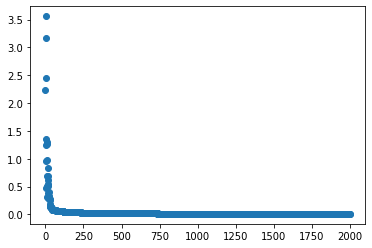

In [70]:
# v2
Loss = []
epochs = 2000
learning_rate = 0.7 
print("epochs =", epochs, "and learning rate =", learning_rate)

model = Sequential()
opt = keras.optimizers.SGD(learning_rate=learning_rate)
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = opt)

h = model.fit(data_points, labels, verbose = 0, epochs = epochs, batch_size = 1000)
Loss = h.history['loss']

weights = model.get_weights()
print("")
print("weights:")
print(weights[0])
print(weights[1]) 

print("")
plt.scatter(np.arange(epochs), Loss)
plt.show()

epochs = 500 and learning rate = 0.001

weights:
[[-0.24790922]
 [ 0.520994  ]]
[-0.089828]



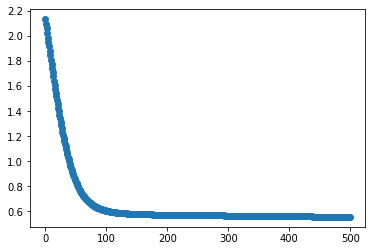

In [80]:
# v3
Loss = []
epochs = 500
learning_rate = 0.001 
print("epochs =", epochs, "and learning rate =", learning_rate)

model = Sequential()
opt = keras.optimizers.SGD(learning_rate=learning_rate)
model.add(Dense(units = 1, use_bias = True, input_dim = 2, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = opt)

h = model.fit(data_points, labels, verbose = 0, epochs = epochs, batch_size = 1000)
Loss = h.history['loss']

weights = model.get_weights()
print("")
print("weights:")
print(weights[0])
print(weights[1]) 

print("")
plt.scatter(np.arange(epochs), Loss)
plt.show()